In [49]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Cross-Validation and Bias-Variance decomposition
## Cross-Validation
Implementing 4-fold cross-validation below:

In [50]:
from helpers import load_data

# load dataset
x, y = load_data()

In [51]:
def build_k_indices(y, k_fold, seed):
    """build k indices for k-fold."""
    num_row = y.shape[0]
    interval = int(num_row / k_fold)
    np.random.seed(seed)
    indices = np.random.permutation(num_row)
    k_indices = [indices[k * interval: (k + 1) * interval]
                 for k in range(k_fold)]
    return np.array(k_indices)

In [64]:
from costs import compute_mse
from ridge_regression import ridge_regression
from build_polynomial import build_poly

def cross_validation(y, x, k_indices, k, lambda_, degree):
    """return the loss of ridge regression."""
    lossTr = []
    lossTe = []
    for i in range (k):
        indices = k_indices[i]
        xTest = x[indices]
        yTest = y[indices]
        xTrain = np.delete(x, indices)
        yTrain = np.delete(y, indices)
        xTestPoly = build_poly(xTest, degree)
        yTestPoly = build_poly(yTest, degree)
        xTrainPoly = build_poly(xTrain, degree)
        yTrainPoly = build_poly(yTrain, degree)        
        weights = ridge_regression (yTrain, xTrainPoly, lambda_)
        lossTr.append(compute_mse(yTrain, xTrainPoly, weights))
        lossTe.append(compute_mse(yTest, xTestPoly, weights))
    loss_tr = sum(lossTr) / len(lossTr)
    loss_te = sum(lossTe) / len(lossTe)
    return loss_tr, loss_te

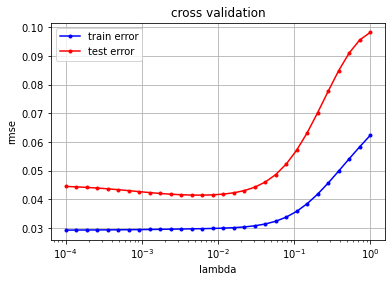

In [65]:
from plots import cross_validation_visualization

def cross_validation_demo():
    seed = 1
    degree = 7
    k_fold = 4
    lambdas = np.logspace(-4, 0, 30)
    # split data in k fold
    k_indices = build_k_indices(y, k_fold, seed)
    # define lists to store the loss of training data and test data
    rmse_tr = []
    rmse_te = []
    # ***************************************************

    for lambda_ in lambdas :
        tempTr, tempTe = cross_validation(y,x,k_indices,k_fold,lambda_, degree)
        rmse_tr.append(tempTr)
        rmse_te.append(tempTe)
    cross_validation_visualization(lambdas, rmse_tr, rmse_te)

cross_validation_demo()

## Bias-Variance Decomposition
Visualize bias-variance trade-off by implementing the function `bias_variance_demo()` below:

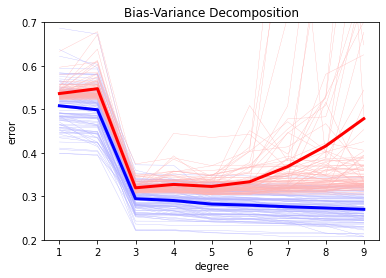

In [76]:
from least_squares import least_squares
from split_data import split_data
from plots import bias_variance_decomposition_visualization

def bias_variance_demo():
    """The entry."""
    # define parameters
    seeds = range(100)
    num_data = 10000
    ratio_train = 0.005
    degrees = range(1, 10)
    
    # define list to store the variable
    rmse_tr = np.empty((len(seeds), len(degrees)))
    rmse_te = np.empty((len(seeds), len(degrees)))
    
    for index_seed, seed in enumerate(seeds):
        np.random.seed(seed)
        x = np.linspace(0.1, 2 * np.pi, num_data)
        y = np.sin(x) + 0.3 * np.random.randn(num_data).T
        xTrain, yTrain, xTest, yTest = split_data(x,y,ratio_train,seed)
        for i in (degrees):
            xTestPoly = build_poly(xTest, i)
            yTestPoly = build_poly(yTest, i)
            xTrainPoly = build_poly(xTrain, i)
            yTrainPoly = build_poly(yTrain, i)  
            _,weights = least_squares(yTrain, xTrainPoly)
            rmse_tr[index_seed, i-1] = np.sqrt(2*compute_mse(yTrain, xTrainPoly, weights))
            rmse_te[index_seed, i-1] = np.sqrt(2*compute_mse(yTest, xTestPoly, weights))

    bias_variance_decomposition_visualization(degrees, rmse_tr, rmse_te)

bias_variance_demo()